## Predict Bike-Sharing need in Metropolitan Area

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- library(dplyr)
- library(ggpubr)
- library(psych)
- library(class)
- library(lattice)
- library(GGally)
- library(gridExtra) 
- library(caTools)
- library(randomForest)
- library(caret)

## Table of Contents

1. [Introduction](#sec_1)
3. [Exploratory Data Analysis](#sec_3)
3. [Methodology](#sec_4)
3. [Model Development](#sec_5)
3. [Results and discussion](#sec_6)
3. [Conclusion](#sec_7)
3. [References](#sec_8)

## 1. Introduction <a class="anchor" id="sec_1"></a>

In this assignment, we have given a dataset which contains $15,147$ instances with 13 columns. With the help of first 8 columns we're going to predict 9th column i.e. rotor temperature (pm). We are not allowed to use three target features i.e. stator_yoke, stator_winding, stator_tooth.

First we'll start with the exploratory data analysis (EDA) to understand the nature of every attribute, correlation between the variables with the help of visual analysis.

Second section starts with the model development with linear regression. The testing dataset contains data associated with profile_id 72 and 81 and rest of the data will be considered as training dataset.

And then last we're going to compare two models in depth to gain statiscal analysis and summarize all the findings of the assignment with a quick summary.


### Data Description:

1. Ambient: it is the surrounding of the rotor
2. Coolant: this liquid maintains the temperature of the rotor by tranferring the heat
3. u_d: voltage in d coordinate
4. u_q: voltage in q coordinate
5. motor_speed: derived from set of currents and voltages
6. torque: this is the twisting force which makes motor running and it is derived from the set of currents and voltages
7. i_d: current in d coordinate
8. i_q: current in q coordinate
9. pm: it is the rotor temperature which will be our target variable

### Importing the required libraries

In [3]:
#importing libraries
library(dplyr)
library(ggpubr)
library(psych)
library(class)
library(lattice)
library(GGally)
library(gridExtra) 
library(caTools)
library(randomForest)
library(caret)

## 2. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

In [4]:
df = read.csv("./pmsm_temperature_data_A1_2021.csv") #reading the given csv file
df = na.omit(df) #to remove the na values from the dataset

In [5]:
dim(df) #finding the dimensions of the dataset with help of dim() function

[1] 15147    13

In [6]:
head(df) #head() funtion is used to see the columns and its values

ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0.1176819,-1.040829,-1.0267303,0.9250645,1.2124813,0.3586899,-0.8343090,0.3229330,-0.08831267,-0.7353304,-0.4340061,-0.2742660,4
-0.5547717,-1.087189,-1.2258921,0.5125759,2.0241232,0.2841797,-1.3638294,0.2340145,0.71040170,-0.4083708,0.1866731,0.5596492,4
-0.7722329,-1.063652,0.2988575,0.9562448,-0.1402458,-0.2591392,1.0291220,-0.2457111,-1.59260400,-1.5299687,-1.6798143,-1.7312210,4
0.2199584,-1.083475,-1.0261079,0.9278145,1.2124836,0.3574240,-0.8381095,0.3228101,-0.14167030,-0.8073816,-0.5005400,-0.3471646,4
0.4015749,-1.078981,0.3155328,-0.7094008,-0.9518901,-0.2562895,1.0291730,-0.2457109,-1.96488810,-1.7469838,-1.9857602,-1.9713503,4
-0.7697667,-1.089577,0.2999456,0.9589649,-0.1402460,-0.2592790,1.0291333,-0.2457186,-1.77564350,-1.5568651,-1.6943698,-1.7499026,4


In [7]:
#Now we're going to take first 9 columns as specified in the instructions.

#Here cor() function tells about the correlation of variables with each other. 
#So that we'll get to know the which variable is highly associated with our target variable.
correlation = cor(df[1:9], method="pearson")
correlation

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm
ambient,1.00000000,0.29806168,0.14522783,0.090443197,0.09340354,-0.216923004,-0.02150512,-0.215261583,0.49579285
coolant,0.29806168,1.00000000,0.15828490,-0.040009453,-0.06987018,-0.161075562,0.13280955,-0.157714976,0.33273139
u_d,0.14522783,0.15828490,1.00000000,-0.044241460,-0.18795159,-0.834602742,0.31702641,-0.811286005,-0.08094098
u_q,0.09044320,-0.04000945,-0.04424146,1.000000000,0.79804238,-0.005299271,-0.36225876,0.001397243,0.13218314
motor_speed,0.09340354,-0.06987018,-0.18795159,0.798042376,1.00000000,0.033811433,-0.77070022,0.019383595,0.31228750
torque,-0.21692300,-0.16107556,-0.83460274,-0.005299271,0.03381143,1.000000000,-0.22851851,0.996858218,-0.05482106
i_d,-0.02150512,0.13280955,0.31702641,-0.362258758,-0.77070022,-0.228518506,1.00000000,-0.200093149,-0.28855700
i_q,-0.21526158,-0.15771498,-0.81128600,0.001397243,0.01938359,0.996858218,-0.20009315,1.000000000,-0.06523648
pm,0.49579285,0.33273139,-0.08094098,0.132183137,0.31228750,-0.054821059,-0.28855700,-0.065236479,1.00000000


Here, cor() function generated a matrix with positive and negative values ranging from +1 to -1.
- The higher the value between two variables, the stronger the relation between them. 
- +1 and -1 shows the perfect linear positive and negative correlation respectively.
- There is no correlation between two variables if its value is 0.

- From the above points, we can say that ambient, coolant and motor_speed are more correlated to pm rather than the other variables.

Let's see the above correlation by plotting a levelplot using lattice library.

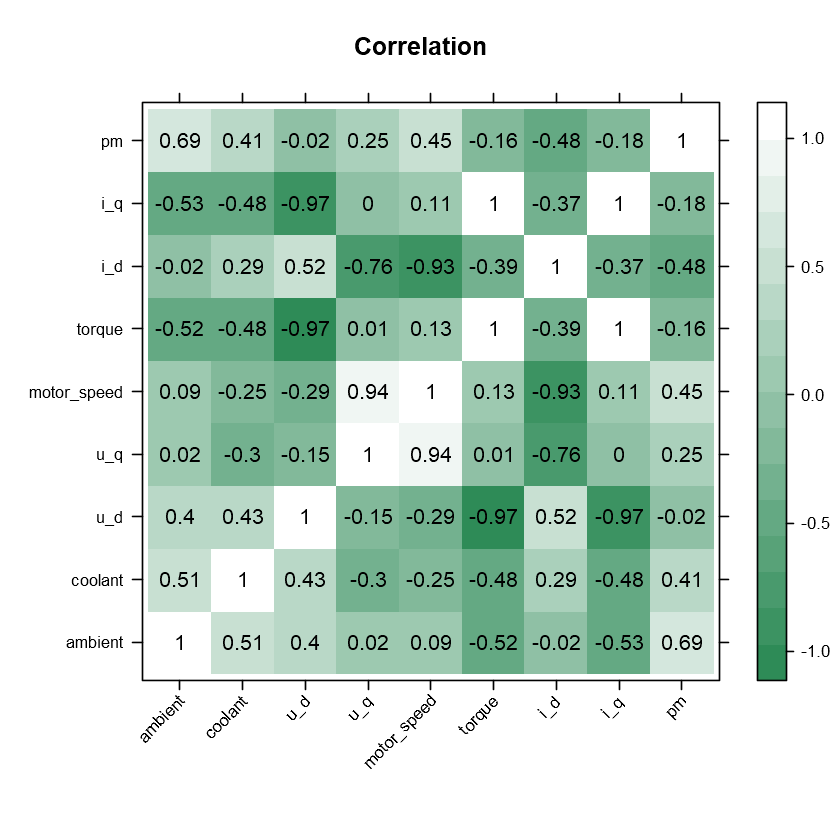

In [8]:
#Defining panel
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}

cols = colorRampPalette(c("seagreen","white")) #use to define the color

#Plotting correlation matrix.
levelplot(cor(correlation), col.regions = cols(100), main = "Correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 45)), panel = myPanel)

In [9]:
#str() function will tell us about the structure of the dataframe with data type of each variable.
#Also the total no of observations and variables this dataframe contains.
str(df[1:9])

'data.frame':	15147 obs. of  9 variables:
 $ ambient    : num  0.118 -0.555 -0.772 0.22 0.402 ...
 $ coolant    : num  -1.04 -1.09 -1.06 -1.08 -1.08 ...
 $ u_d        : num  -1.027 -1.226 0.299 -1.026 0.316 ...
 $ u_q        : num  0.925 0.513 0.956 0.928 -0.709 ...
 $ motor_speed: num  1.212 2.024 -0.14 1.212 -0.952 ...
 $ torque     : num  0.359 0.284 -0.259 0.357 -0.256 ...
 $ i_d        : num  -0.834 -1.364 1.029 -0.838 1.029 ...
 $ i_q        : num  0.323 0.234 -0.246 0.323 -0.246 ...
 $ pm         : num  -0.0883 0.7104 -1.5926 -0.1417 -1.9649 ...


In [10]:
#this function is used for advanced descriptive statistics
describe(df[1:9])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ambient,1,15147,-0.10739655,0.8329683,-0.14028142,-0.06174313,0.7209201,-3.327762,2.710575,6.038337,-0.64807481,1.8063443,0.006768075
coolant,2,15147,0.18124771,1.0321194,-0.04497305,0.11050250,1.1787429,-1.237039,2.294643,3.531683,0.46240105,-1.0733935,0.008386227
u_d,3,15147,0.11019371,0.9220799,0.30010197,0.09467639,0.5806362,-1.653711,2.273458,3.927169,0.01785533,-0.1781162,0.007492129
u_q,4,15147,-0.19096468,1.0496645,-0.38063500,-0.27708898,1.3511849,-1.814612,1.770184,3.584796,0.41875933,-1.2659929,0.008528785
motor_speed,5,15147,-0.19125923,1.0272826,-0.43180645,-0.29377896,1.1721783,-1.222439,2.024132,3.246571,0.53808645,-1.1064501,0.008346927
torque,6,15147,-0.08395795,0.9168406,-0.25563973,-0.09302823,0.4894976,-3.316342,3.013790,6.330132,0.16198566,1.4394998,0.007449558
i_d,7,15147,0.17748119,0.9690157,0.58743656,0.31584447,0.6548881,-3.176439,1.060168,4.236606,-0.83478383,-0.4706967,0.007873494
i_q,8,15147,-0.08146842,0.9167172,-0.24570811,-0.08938232,0.5368236,-3.308669,2.914178,6.222847,0.12262161,1.4412679,0.007448555
pm,9,15147,-0.12677864,0.9198188,-0.12050689,-0.12073181,0.9821184,-2.605213,2.905198,5.510411,-0.01404048,-0.2376653,0.007473757


Here are the observation from the describe function:
- u_q has the highest value of `sd` whereas ambient has the lowest value.
- ambient is more clustered around the mean in comparison to the other variables. 
- Here, skewness of ambient is in negative which means mean of the data is less than the median which makes data dirstibution to left-skewed.
- motor_speed and torque has positive skewness which shows their mean value is higher than the median values which makes data distribution to right-skewed.

`trimmed` is the robust version of mean.
`se` shows how far the mean of the sample population is likely to the true population
<br>
<br>

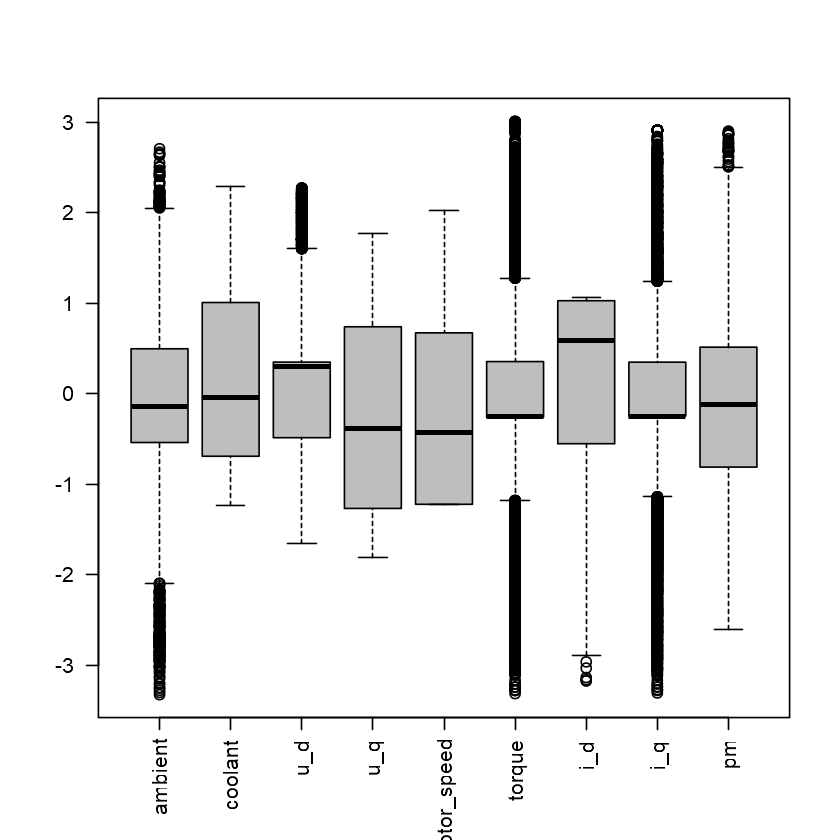

In [11]:
boxplot(df[1:9], las=2, cex.axis=1, col = 'grey')

Three variables i.e. ambient, torque and i_q contains most of the outliers which means most of the oberservations are far from other observation in these 3 variables.<br>
<br>
Now, we're going to visualize and discuss these 3 variables separately below.

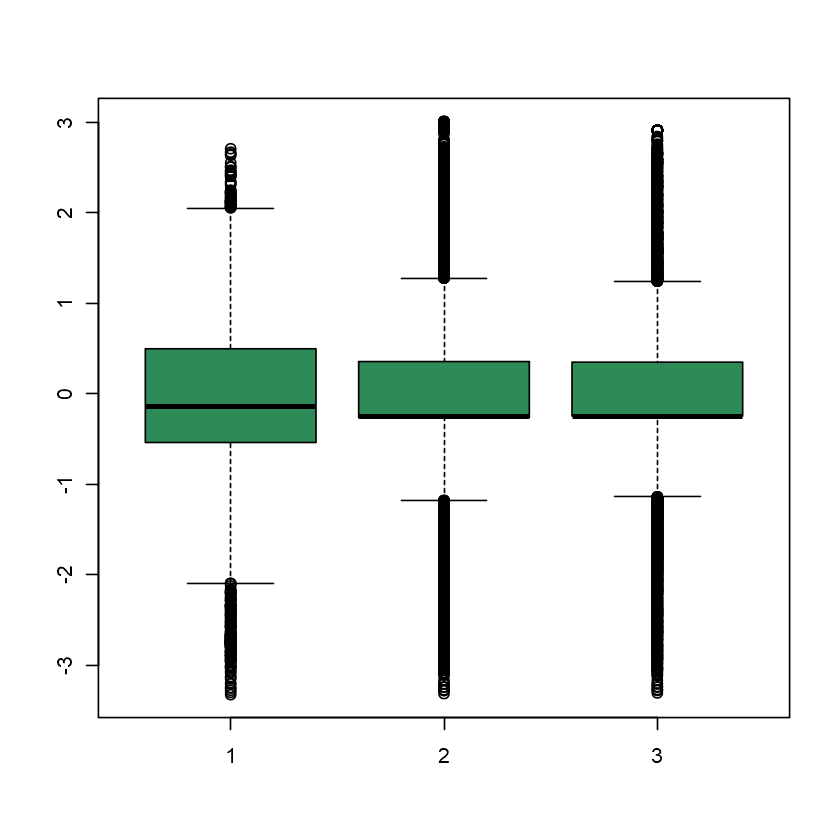

In [12]:
boxplot(df$ambient, df$torque, df$i_q, col = 'seagreen')

We can see that data in torque and i_q is positively skewed whereas data in ambient is almost normally distributed.
Small box of torque and i_q than ambient shows that data in torque and i_q have same level of impact on motor.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



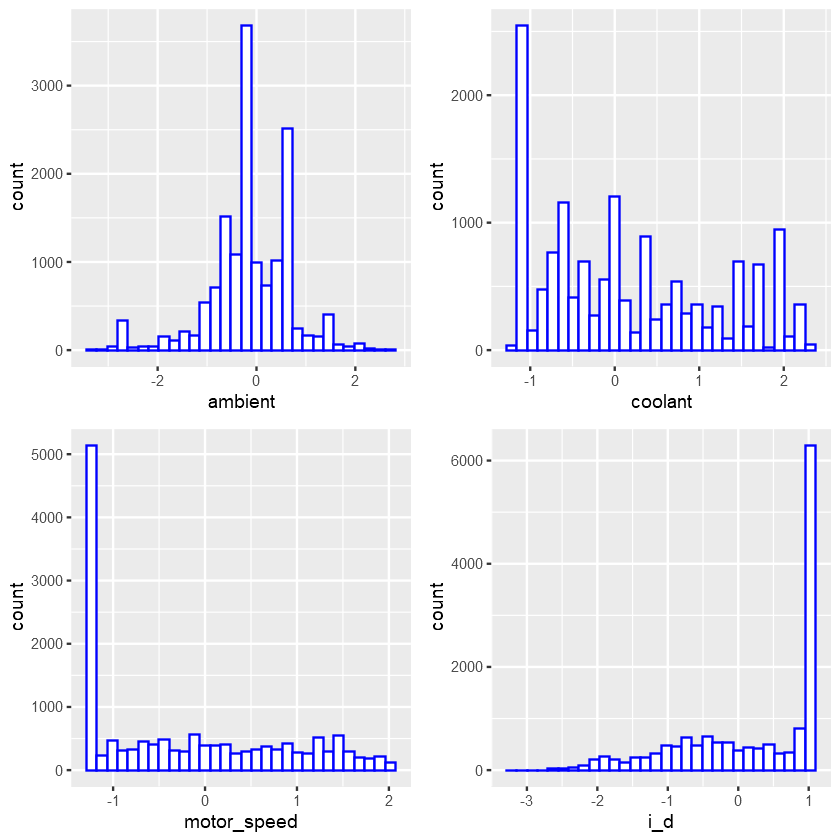

In [13]:
p1 <- ggplot(aes(x=ambient), data =  df) + 
          geom_histogram(color = I('blue'), fill = "white") 
p2 <- ggplot(aes(x=coolant), data =  df) + 
          geom_histogram(color = I('blue'), fill = "white")
p3 <- ggplot(aes(x=motor_speed), data =  df) + 
          geom_histogram(color = I('blue'), fill = "white")
p4 <- ggplot(aes(x=i_d), data =  df) + 
          geom_histogram(color = I('blue'), fill = "white")

grid.arrange(p1, p2, p3, p4)

From the above plots, we can conclude that:
- ambient is normally distributed
- coolant's distribution is majorly in between -1.5 to 0.5 and other are skewed to the left
- motor_speed's major part is skewed right between and others seem normally distributed
- i_d is skewed to the left

## 3. Methodology<a class="anchor" id="sec_4"></a>

We explore the data with various functions to check the correlation, data distribution with respect to multiple predictors, outliers. The above funciton shows how predictors are relared to each other and how one predictor has significant effect on other predictor.<br>
Now, we're going to make various models to test our data. We will choose or exclude predictors according to it. Some diagnostic plots can help to see the linear relation between the predictors.<br>
Atlast, we'll check random forest algorithm to test data and some accuracy function to find how perfect is our model is.

## 4. Model Development <a class="anchor" id="sec_5"></a>

In [14]:
# we're going to take data associated with profile_id 72 and 81 as a test data
test = filter(df, profile_id==72 | profile_id==81)
test_data = test[1:9]

In [15]:
#excluding test data so that we have remaining only training data
train = filter(df, profile_id!=71 | profile_id!=81)
train_data = train[1:9]

##### Model 1 where we predict the rotor temperature using multiple linear regression model

In [16]:
model_1 = lm(pm~., data = train_data) # pm~. means model regresses pm on all other variables
prediction_1 = predict(model_1, test_data) #prediction using test data

In [17]:
summary(model_1) #to get the statistical values for further analysis


Call:
lm(formula = pm ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7807 -0.4582 -0.0370  0.4732  3.3652 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.071631   0.005997 -11.944  < 2e-16 ***
ambient      0.449824   0.007356  61.150  < 2e-16 ***
coolant      0.220307   0.005869  37.537  < 2e-16 ***
u_d         -0.185498   0.013829 -13.413  < 2e-16 ***
u_q         -0.279147   0.013006 -21.462  < 2e-16 ***
motor_speed  0.463075   0.020188  22.938  < 2e-16 ***
torque      -0.376638   0.103681  -3.633 0.000281 ***
i_d         -0.001189   0.014060  -0.085 0.932593    
i_q          0.275916   0.097208   2.838 0.004540 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6997 on 15138 degrees of freedom
Multiple R-squared:  0.4217,	Adjusted R-squared:  0.4214 
F-statistic:  1380 on 8 and 15138 DF,  p-value: < 2.2e-16


Here, summary() function gave us some statiscal values for further statistical analysis. `p-value` from above function tells which is a good indicator to find out the highly associated variables to our target variable. We can say that having `p-value` < 0.05 will be the good indicator.<br>

ambient, coolant, u_d, u_q, motor_speed, torque have high significant on the model so we can say these variables will reject the null hypothesis. 

So, except i_d, all are the good predictors. But ambient, coolant, u_d, u_q, motor_speed are the strongest predictors for the rotor temperature.

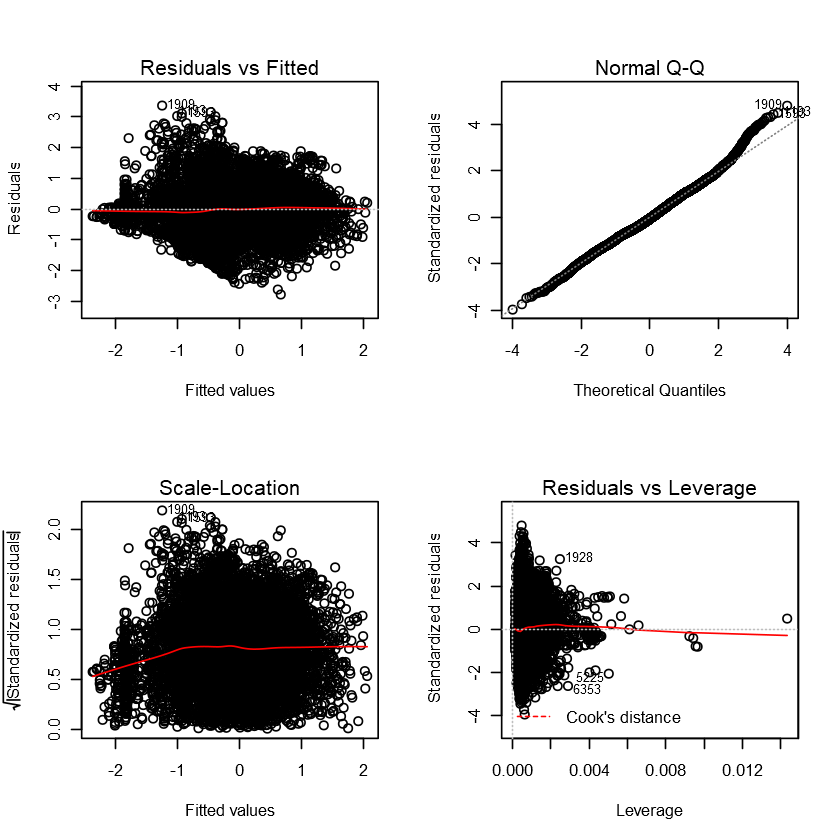

In [18]:
par(mfrow=c(2,2)) #used to plot multiple graphs in a single plot using graphical parameters
plot(model_1) #it will show the diagnostic plots of the linear regression fit

Results from above plots:
- Residuals vs Fitted: This plot shows if residuals have non-linear patterns or not. Residuals are properly scattered in the plot. The red dashed line is well fitted to the horizontal line which is good indicator of being a linear pattern.
- Normal Q-Q: From this Quantile-Quantile plot, we can say that residuals are almost normally distributed to the line. Generally, for linear regression, we can assume that residuals are normally distributed with mean equal to zero and constant variance. Here, 95% percent of the standardized residual lying on dashed line but some are not so we can say it is not the strict linear relationship.
- Scale-Location: This plot is used to check the spread of the residuals along the ranges of predictors. The above shown horizontal line seems having equally spread points. Horizontal line is the good indicator for the homoscedasticity.
- Residuals vs Leverage: This plot identify influential data samples. Here, we can look for the cook's distance(red dashed line) to find the influential samples but there are barely some cases which are outside. These influential points can alter the regression result if we exclude them. There are some outliers as we can see in the plot. So, to conclude, we can say there are 4-5 influential cases observed. 

In [19]:
#setting up the label to find the rmse score
label <- train_data$pm

In [20]:
#function for finding the root mean squared score
#it will find the difference between the predicted value and true value with some extra function to generate rmse score
#lower the value is, better the model will be.
rmse <- function(prediction_1, label){
    return(sqrt(mean((prediction_1 - label)^2)))} #prediction_1 are the model fitted values whereas label are the observed values

In [21]:
#find the accuracy value of the model. less the value of rmse, more perfect our model will be.
rmse_value <- rmse(prediction_1, test_data$pm)
rmse_value

[1] 0.6348864

Let's look with step() function that which predictors have more effect on rotor temperature

In [22]:
step(model_1)

Start:  AIC=-10809.58
pm ~ ambient + coolant + u_d + u_q + motor_speed + torque + i_d + 
    i_q

              Df Sum of Sq    RSS      AIC
- i_d          1      0.00 7411.0 -10811.6
<none>                     7411.0 -10809.6
- i_q          1      3.94 7415.0 -10803.5
- torque       1      6.46 7417.5 -10798.4
- u_d          1     88.08 7499.1 -10632.6
- u_q          1    225.51 7636.5 -10357.6
- motor_speed  1    257.58 7668.6 -10294.1
- coolant      1    689.82 8100.8  -9463.5
- ambient      1   1830.64 9241.7  -7467.8

Step:  AIC=-10811.57
pm ~ ambient + coolant + u_d + u_q + motor_speed + torque + i_q

              Df Sum of Sq    RSS      AIC
<none>                     7411.0 -10811.6
- i_q          1      4.15 7415.2 -10805.1
- torque       1      6.98 7418.0 -10799.3
- u_d          1     96.74 7507.8 -10617.1
- u_q          1    399.09 7810.1 -10019.1
- coolant      1    697.74 8108.8  -9450.7
- motor_speed  1    984.53 8395.6  -8924.2
- ambient      1   1836.12 9247.2  -7460.


Call:
lm(formula = pm ~ ambient + coolant + u_d + u_q + motor_speed + 
    torque + i_q, data = train_data)

Coefficients:
(Intercept)      ambient      coolant          u_d          u_q  motor_speed  
   -0.07168      0.44986      0.22025     -0.18514     -0.27987      0.46454  
     torque          i_q  
   -0.37404      0.27383  


Here, value of AIC can determine which variables have high impact on. Lower the AIC value more the impact of the predictors. So, AIC = -10811.57 with predictors i_q, torque, u_d, u_q, coolant, motor_speed, ambient have more impact on the model.

##### Model 2  where we're going to take only higly correlated values to our target value i.e. ambient, coolant, motor_speed and then make new model using various predictors

This is almost same as model model 1 but here we're going to take those variables which are highly correlated to our target variable in our correlation matrix and then we add some more predictors.

In [25]:
# pm~. means model regresses pm on ambient, coolant and motor_speed
model_2 = lm(pm~., data = subset(train_data, select=c(ambient, coolant, motor_speed, pm)))
prediction_2 = predict(model_2, test_data) #prediction using test data

In [26]:
summary(model_2)


Call:
lm(formula = pm ~ ., data = subset(train_data, select = c(ambient, 
    coolant, motor_speed, pm)))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6298 -0.4639 -0.0622  0.4739  3.2864 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.067420   0.006211  -10.86   <2e-16 ***
ambient      0.440334   0.007536   58.43   <2e-16 ***
coolant      0.208752   0.006070   34.39   <2e-16 ***
motor_speed  0.260924   0.005847   44.62   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7321 on 15143 degrees of freedom
Multiple R-squared:  0.3666,	Adjusted R-squared:  0.3665 
F-statistic:  2922 on 3 and 15143 DF,  p-value: < 2.2e-16


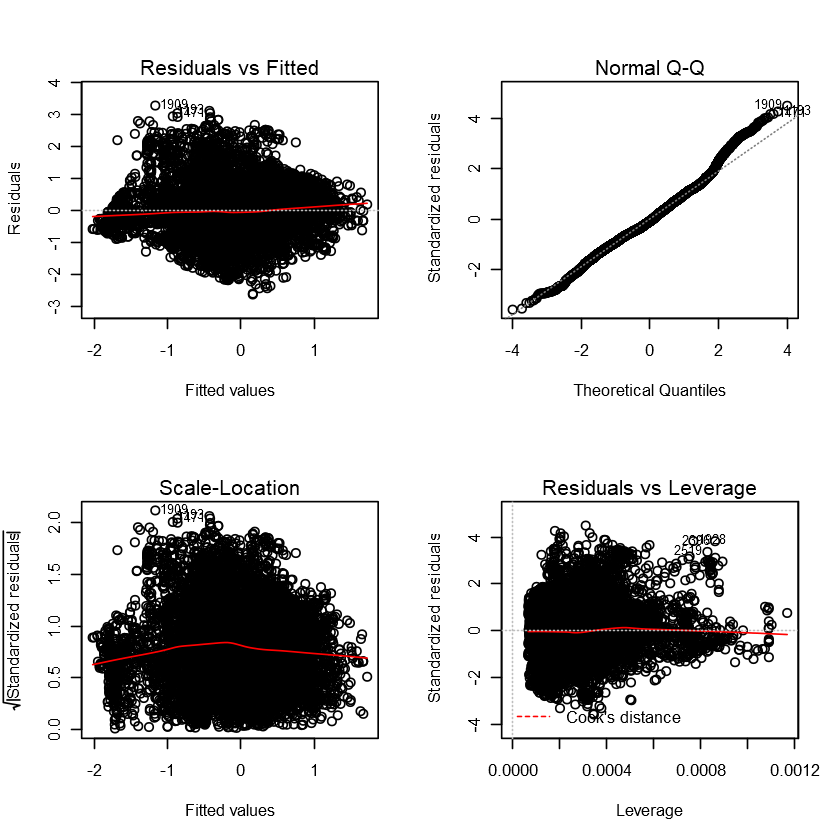

In [27]:
par(mfrow=c(2,2)) #this par() function will create a mutli-plot graphic with 2 rows and 2 columns 
plot(model_2) #plotting diagnostic plots of linear regresion fit using plot() function

Results from above plots:
- Residuals vs Fitted: This plot shows if residuals have non-linear patterns or not. Residuals are not properly scattered in the plot. We can see that red dashed line is not properly fitted to the horizontal line at the starting and at the end. So, it means relationship between variables is non-linear.
- Normal Q-Q: From this Quantile-Quantile plot, we can say that residuals are almost normally distributed to the line. So same as from model_1, this Q-Q plot has not strict linear relationship.
- Scale-Location: This plot is used to check the spread of the residuals along the ranges of predictors. The above shown horizontal line seems almost equally spread points rather than in between the points are more spread on the upper side.
- Residuals vs Leverage: This plot identify influential data samples. Here, we can look for the cook's distance(red dashed line) to find the influential samples but there are barely some cases which are outside. These sample can alter the regression result if we exclude them. There are some outliers but they won't make any change to the model because these are inside the cook's distance. To conclude, there are not any influential points which can alter the results.

Now we'll add up more predictors to our model_2 to see how well it will perform.

In [28]:
model_2_1 = lm(pm~., data = subset(train_data, select=c(ambient, coolant, motor_speed, u_d, pm)))
prediction_2_1 = predict(model_2_1, test_data)
summary(model_2_1)


Call:
lm(formula = pm ~ ., data = subset(train_data, select = c(ambient, 
    coolant, motor_speed, u_d, pm)))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5621 -0.4645 -0.0575  0.4712  3.3037 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.057565   0.006154  -9.355   <2e-16 ***
ambient      0.459336   0.007504  61.213   <2e-16 ***
coolant      0.221031   0.006026  36.677   <2e-16 ***
motor_speed  0.238373   0.005886  40.497   <2e-16 ***
u_d         -0.130251   0.006613 -19.695   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7229 on 15142 degrees of freedom
Multiple R-squared:  0.3825,	Adjusted R-squared:  0.3823 
F-statistic:  2344 on 4 and 15142 DF,  p-value: < 2.2e-16


Here, we can see the value of R-square has incresed with adding up 'u_d' predictor to the model. Now lets test by adding up 'u_d'.

In [29]:
model_2_2 = lm(pm~., data = subset(train_data, select=c(ambient, coolant, motor_speed, u_d, u_q, pm)))
prediction_2_2 = predict(model_2_2, test_data)
summary(model_2_2)


Call:
lm(formula = pm ~ ., data = subset(train_data, select = c(ambient, 
    coolant, motor_speed, u_d, u_q, pm)))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7685 -0.4614 -0.0431  0.4744  3.3825 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.070349   0.005982  -11.76   <2e-16 ***
ambient      0.458569   0.007277   63.02   <2e-16 ***
coolant      0.221161   0.005844   37.84   <2e-16 ***
motor_speed  0.475644   0.009552   49.79   <2e-16 ***
u_d         -0.094770   0.006515  -14.55   <2e-16 ***
u_q         -0.283553   0.009153  -30.98   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7011 on 15141 degrees of freedom
Multiple R-squared:  0.4193,	Adjusted R-squared:  0.4191 
F-statistic:  2186 on 5 and 15141 DF,  p-value: < 2.2e-16


In this model, R-squared value is incresed as compared to the last model.<br><br> If compare this model to our model_1 then it's complexity is less than model_1 where we included all the predictors. So we take model_2_2 as our final model.

In this model's summary, `p-value` of all the variables are same i.e. p<2e-16 which is a good indicator. We can see that Adjusted R-squared value is has incresed than the above model which means having high value compared to our previous model is increasing the value to this model.

Residual standard error says that data is more fitted with these limited no of variables as compared to the full model.

F-statistic shows both model have `p-vlaue` less than 0.05 which means both have statistical significant between the independent variables and target value.

In [36]:
rmse <- function(prediction_2_2, label){
    return(sqrt(mean((prediction_2_2 - label)^2)))}

In [37]:
#root mean squared value for model_2
rmse_value <- rmse(prediction_2_2, test_data$pm)
rmse_value

[1] 0.6359495

The smaller the value of rmse is, the better the model it is. Model_1 has a value of 0.63488 and model_2_2 has a value of 0.6359. Overall there is very minimal difference between both rmse values.

###### Model 3 is based on random forest algorithm

Random Forest algorithm is one the robust machine learning algorithm for regression as well as classification. As name suggests, it makes decision tree randomly. Decision tree has a problem of overfitting that's why we're going to use random forest. 
Also it is one of the fast algorithm as compared to other regression models.

In [32]:
#random forest algorithm is derived from the randomForest library.
set.seed(123)
model_3 <- randomForest(pm ~ . , train_data, ntree = 70, mtry = 7, importance = TRUE)

In [33]:
model_3 


Call:
 randomForest(formula = pm ~ ., data = train_data, ntree = 70,      mtry = 7, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 70
No. of variables tried at each split: 7

          Mean of squared residuals: 0.08726891
                    % Var explained: 89.68

From the above model, we can interpret that there are 70 trees that we are going to fit. And no of variables randomly selected at each split are 7. We can try different values of ntree to get the best model. Default value is 500.  <br>
Variance percentage shows how well our model performed. So 89.51 percentage says, it performed very well.

Let's test one more random forest model with ntree = 50.

In [34]:
set.seed(123)
model_3_1 <- randomForest(pm ~ . , train_data, ntree = 50, mtry = 7, importance = TRUE)
model_3_1


Call:
 randomForest(formula = pm ~ ., data = train_data, ntree = 50,      mtry = 7, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 50
No. of variables tried at each split: 7

          Mean of squared residuals: 0.08924466
                    % Var explained: 89.45

In the above model, we can see variance percentage is decreased a bit. So it means decresing the number of trees can decrease the model's performance. Now lets see what happens if we increse the number of tree to 200.

In [35]:
set.seed(123)
model_3_2 <- randomForest(pm ~ . , train_data, ntree = 200, mtry = 7, importance = TRUE)
model_3_2


Call:
 randomForest(formula = pm ~ ., data = train_data, ntree = 200,      mtry = 7, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 7

          Mean of squared residuals: 0.08457094
                    % Var explained: 90

Above model shows significant results as compared to other random forest models. So this is our final model of random forest.

In [41]:
random_pred = predict(model_3_2, test_data) #predicting on test_data

In [42]:
rmse <- function(random_pred, label){
    return(sqrt(mean((random_pred - label)^2)))}

In [43]:
postResample(random_pred, test_data$pm)

RMSE   Rsquared        MAE 
0.05938769 0.99265123 0.03219485

This rmse_value for model_3_2 is comparativley low as compared to model_3 and model_2_1. Which means model_3_2 is the best fit for the given data. Also, Rsquared value is very high which means this is the best model on test_data.

To check the importance of the variables, we can use varImpPlot() function.

In [44]:
varImp(model_3_2)

,Overall
ambient,217.07520
coolant,208.90005
u_d,56.38948
u_q,60.20038
motor_speed,37.93821
torque,52.24971
i_d,38.86493
i_q,39.17673


This varImpPlot() tells about the importance of the predictors. Here, we can see ambient has most significance on model as compared to other predictors. So, the best five predictors for our model are ambient, coolant, u_d, u_q and torque.

## 5. Results and discussion <a class="anchor" id="sec_6"></a>

To compare the models, we can look for the R-squared and F-statistic values and anova() test.

Model_1 and model_2 has a difference in R-squared and Adjusted R-squared values. Scores are dropped from model_1 to model_2. In this case, model with more predictors give more accuracy so we can choose the model_1. Overall, in F-statistics, `p-value` has same value in both the models. So both models are statiscally significant but we are going to take model_1 because of its Adjusted R-Squared values.

In [45]:
anova(model_1, model_2_2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
15138,7411.028,NA,NA,NA,NA
15141,7441.793,-3,-30.76439,20.94677,1.547316e-13


From the above anova test between model_1 and model_2_2, we can interpret that model_2 has very less `p-value`. So we can accept the alternate hypothesis that there is significant relationship between the predictors and target variable as compared to model_1.<br> <br>

Lets see the random forest plot.

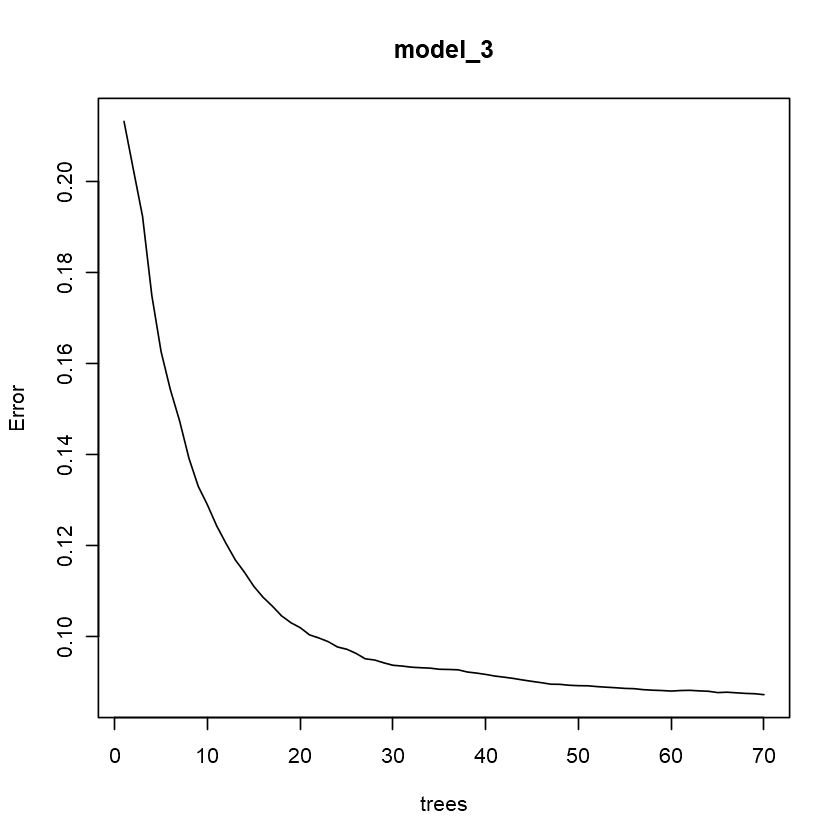

In [46]:
plot(model_3)

This plot shows the relationship between the error and the number of trees. We can examine that, error rate is droping as we are adding more number of trees.

## 6. Conclusion<a class="anchor" id="sec_7"></a>

In multiple linear regression models, ambient (most significant predictor), coolant, motor_speed, u_d, u_q, pm are most significant predictors for the burned area. i_d is the least significant predictor. 
<br><br>
In Random forest algorithm, ambient, coolant, u_d, u_q and torque are the best predictors. After performing various models in random forest using different number of trees shows different value of rmse. model_3_2 shows best result. <br><br>

To conclude, random forest is the best model with highest rmse value for the given dataset as compared to multiple linear model.

## 7. References <a class="anchor" id="sec_8"></a>

* Siddiqui, D. (2018). Understanding and interpreting boxplots <br> Retrieved from: https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c

* Adam. (2107). Random Forest Regression Trees in R <br>Retrieved from: https://educationalresearchtechniques.com/2017/05/10/random-forest-regression-trees-in-r/

* Kuhn, M. (2019). Variable Importance <br> Retrieved from: https://topepo.github.io/caret/variable-importance.html